In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


0.26401558741392617 0.2640155874139923


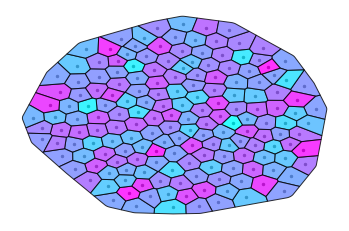

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [9]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+(x)*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

1.1051709180756477


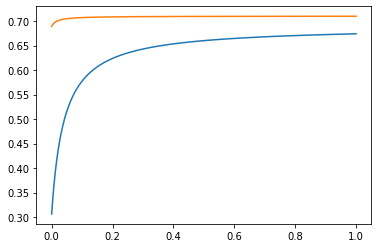

In [136]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(4)
eta_b = np.exp(3)
eta_c = np.exp(2)
eta = np.exp(0.1)

b = 0.2
c = 0.3
a = np.linspace(0,1,1000)

eta2 = eta#1/(eta_a*a)*((1+eta_a*a)**2/(1+eta_b*b + eta_a*a) - 1)  #np.exp(-3)
print(eta2)

p_C1 = eta_c*c*(1+eta_a*a)/(1 + eta_c*c*(1+eta_a*a) + eta_b*b + eta_a*a)
p_C2 = eta_c*c*(1+eta_a*eta2*a)/(1 + eta_c*c*(1+eta_a*eta2*a) + eta_a*a)
#p_C3 = eta_c*c/(1 + eta_c*c)

plt.plot(a, p_C1)
plt.plot(a, p_C2)
#plt.plot(c, p_C3, 'k--')